# Exploring Ocean Color with NASA PACE (Teen Volunteer Session)

Today you’ll:
- Look at chlorophyll in the Pacific Northwest
- Make a real satellite map using Python
- Change the map to explore other regions

This is NASA science data — you’re just using it in a simpler way.

In [2]:
!pip install earthaccess cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.2/71.2 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.5/202.5 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 81.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 4.0.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2026.2.0 which is incompatible.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2026.2.0 which is incompatible.


In [3]:
# Imports
import earthaccess
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## Login to NASA Earthdata

If this is your first time using NASA Earthdata, you may be asked to log in.

In [4]:
earthaccess.login(persist=True)

Enter your Earthdata Login username: ocean_tutorials
Enter your Earthdata password: ··········


## Load a PACE monthly Level-3 chlorophyll file

We’ll use a monthly, gridded product (Level-3) so it’s quick to plot.

Tip: If you want a different month later, change the `temporal` dates.

In [5]:
results = earthaccess.search_data(
    short_name="PACE_OCI_L3M_CHL",
    temporal=("2024-06-01", "2024-06-30"),
    granule_name="*.MO.*.0p1deg.*"
)

files = earthaccess.open(results)
ds = xr.open_dataset(files[0])
ds

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

<xarray.Dataset> Size: 26MB
Dimensions:  (lat: 1800, lon: 3600, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 7kB 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * lon      (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    chlor_a  (lat, lon) float32 26MB ...
    palette  (rgb, eightbitcolor) uint8 768B ...
Attributes: (12/64)
    product_name:                      PACE_OCI.20240601_20240630.L3m.MO.CHL....
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    identifier_product_doi:            10.5067/PACE/OCI/L3M/CHL/3.1
    keywords:                          Earth Science > Oceans > Ocean Chemist...
    keywords_vocabulary:               NASA Global Change Master Directory (G...
    data_bins:                         2965700
    data_minimum:                      0.0009999999
    data_maximum:                      99.54038

## Choose a region (Pacific Northwest)

These numbers define a rectangle:
- **Latitude:** 40 to 52
- **Longitude:** -130 to -120

Try changing them to explore other places (e.g., Puget Sound vs. Oregon coast).

In [7]:
lat_min, lat_max = 40, 52
lon_min, lon_max = -130, -120

chl = ds["chlor_a"].sel(
    lat=slice(lat_max, lat_min),
    lon=slice(lon_min, lon_max)
)
chl

<xarray.DataArray 'chlor_a' (lat: 120, lon: 100)> Size: 48kB
[12000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 480B 51.95 51.85 51.75 51.65 ... 40.25 40.15 40.05
  * lon      (lon) float32 400B -129.9 -129.9 -129.8 ... -120.2 -120.2 -120.0
Attributes:
    long_name:      Chlorophyll Concentration, OCI Algorithm
    units:          mg m^-3
    standard_name:  mass_concentration_of_chlorophyll_in_sea_water
    valid_min:      0.001
    valid_max:      100.0
    reference:      Hu, C., Lee Z., and Franz, B.A. (2012). Chlorophyll-a alg...
    display_scale:  log
    display_min:    0.01
    display_max:    20.0

## Make a map

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


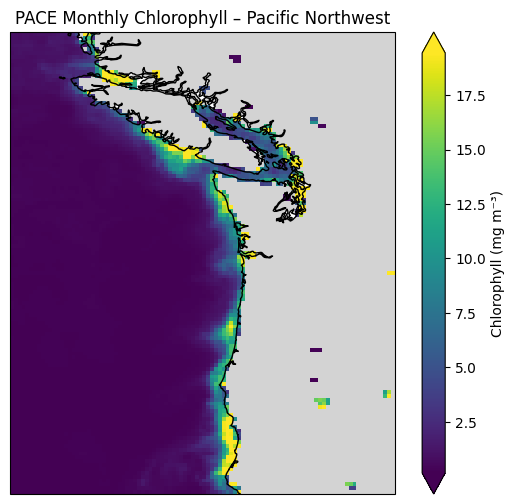

In [8]:
fig = plt.figure(figsize=(7, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

chl.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    robust=True,
    cmap="viridis",
    cbar_kwargs={"label": "Chlorophyll (mg m⁻³)"}
)

ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor="lightgray")
ax.set_extent([lon_min, lon_max, lat_min, lat_max])

ax.set_title("PACE Monthly Chlorophyll – Pacific Northwest")
plt.show()

## Try this!

Change the `lat_min`, `lat_max`, `lon_min`, `lon_max` values above and re-run.

Ideas:
- Zoom into **Puget Sound** (smaller box around Seattle)
- Move south toward **Oregon**
- Compare **coast vs open ocean**
- Zoom way out and see what patterns appear

## Other PACE Level-3 products to explore

If you want to try other images, swap the `short_name` in the search cell.

- `PACE_OCI_L3M_SST` — Sea surface temperature
- `PACE_OCI_L3M_KD` — Water clarity (diffuse attenuation)
- `PACE_OCI_L3M_RRS` — Ocean reflectance (light itself)
- `PACE_OCI_L3M_POC` — Particulate organic carbon

Not every product will be available for every date — that’s normal.